In [4]:
from logicqubit.logic import *
from logicqubit.zhegalkin import *

In [5]:
# Uf*H|x1,x2,x3>|000>
# x1 x2 x3 y1 y2 y3
# 0  0  0  1  1  0
# 0  0  1  0  0  1
# 0  1  0  1  1  1
# 0  1  1  0  0  1
# 1  0  0  0  1  1
# 1  0  1  1  1  0
# 1  1  0  0  0  0
# 1  1  1  0  0  0

poly = Zhegalkin_Poly()
poly.addTable(['000','010','101'])       # y1
poly.addTable(['000','010','100','101']) # y2
poly.addTable(['001','010','011','100']) # y3
poly.Compute()
poly.ShowPolynomial(short=False)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

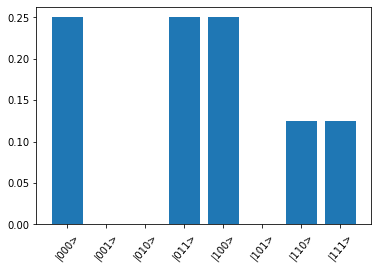

In [8]:
# pol = x1^0x2^0x3^0 + x1^0x2^0x3^1 + x1^0x2^1x3^0 + x1^0x2^1x3^1 + x1^1x2^0x3^0 
# + x1^1x2^0x3^1 + x1^1x2^1x3^0 + x1^1x2^1x3^1

logicQuBit = LogicQuBit(8, first_left=True)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()

x1.H()
x2.H()
x3.H()

a1 = Qubit() # ancilla qubit
a2 = Qubit()

y1 = Qubit()
y2 = Qubit()
y3 = Qubit()

# p/ y1
# p = (1,1,0,0,1,0,0,1)
a1.CCX(x1,x2)
y1.CCX(x3,a1)
y1.CX(x1)
y1.CX(x3)
y1.X()

# p/ y2
# p = (1,1,0,0,0,1,1,0)
y2.CCX(x1,x2)
y2.CCX(x1,x3)
y2.CX(x3)
y2.X()

# p/ y3
# p = (0,1,1,1,1,0,0,0)
y3.CX(x1)
y3.CCX(x2,x3)
y3.CX(x2)
y3.CX(x3)

res = logicQuBit.Measure([y1,y2,y3])
logicQuBit.Plot()